In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import os
import sys
sns.set_style("darkgrid")

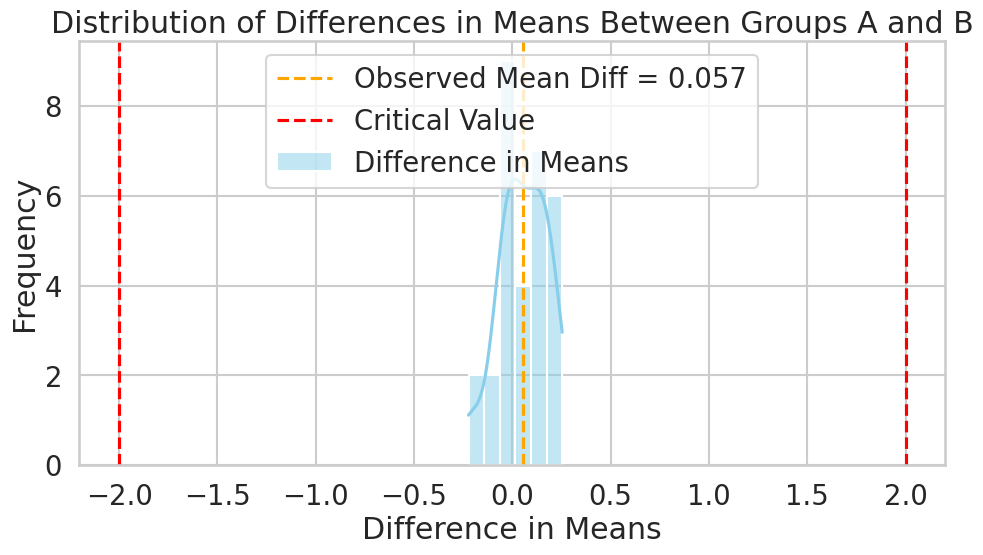

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Ustawienia stylu dla wykresów naukowych
sns.set(style="whitegrid", context="talk", font_scale=1.2)
np.random.seed(42)

# Parametry
n_A = n_B = 30  # Rozmiary próbek
mu_A = 0.5  # Średnia grupy A
mu_B = 0.55  # Średnia grupy B
sigma = 0.1  # Odchylenie standardowe dla obu grup
alpha = 0.05  # Poziom istotności

# Generowanie danych
data_A = np.random.normal(mu_A, sigma, n_A)
data_B = np.random.normal(mu_B, sigma, n_B)

# Obliczanie różnicy średnich i statystyki t
mean_diff = np.mean(data_B) - np.mean(data_A)
pooled_var = ((n_A - 1) * np.var(data_A) + (n_B - 1) * np.var(data_B)) / (n_A + n_B - 2)
t_stat = mean_diff / np.sqrt(pooled_var * (1/n_A + 1/n_B))

# Wizualizacja rozkładu różnic średnich
plt.figure(figsize=(10, 6))
sns.histplot(data_B - data_A, kde=True, color="skyblue", label="Difference in Means")
plt.axvline(mean_diff, color='orange', linestyle='--', label=f'Observed Mean Diff = {mean_diff:.3f}')
plt.axvline(t.ppf(1 - alpha/2, df=n_A + n_B - 2), color='red', linestyle='--', label='Critical Value')
plt.axvline(-t.ppf(1 - alpha/2, df=n_A + n_B - 2), color='red', linestyle='--')
plt.title('Distribution of Differences in Means Between Groups A and B')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()

# Zapisanie wykresu jako plik .png o wysokiej rozdzielczości
plt.tight_layout()
plt.savefig('ab_test_simulation.png', dpi=300)

# Wyświetlenie wykresu
plt.show()


# Figure ab_test_distribution

/tmp/ipykernel_464147/2380275978.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p_A, 'k', linewidth=2, color='blue')
/tmp/ipykernel_464147/2380275978.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p_B, 'k', linewidth=2, color='orange')


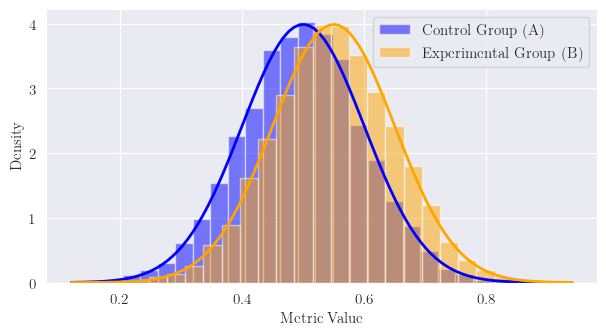

In [25]:
W = 6.2   # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

plt.rcParams['savefig.dpi'] = 300

np.random.seed(42)  
mu_A = 0.5  
mu_B = 0.55  
sigma = 0.1
n = 6000

data_A = np.random.normal(mu_A, sigma, n)
data_B = np.random.normal(mu_B, sigma, n)

plt.hist(data_A, bins=25, alpha=0.5, label='Control Group (A)', color='blue', density=True)
plt.hist(data_B, bins=25, alpha=0.5, label='Experimental Group (B)', color='orange', density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_A = stats.norm.pdf(x, mu_A, sigma)
p_B = stats.norm.pdf(x, mu_B, sigma)
plt.plot(x, p_A, 'k', linewidth=2, color='blue')
plt.plot(x, p_B, 'k', linewidth=2, color='orange')

plt.xlabel('Metric Value')
plt.ylabel('Density')
# plt.title('Distribution of Outcomes in Classical A/B Test')
plt.legend()
plt.tight_layout()
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/imagens/ab_test_distribution.png')
                                                                 ab_test_simulation
plt.show()


# Figure X

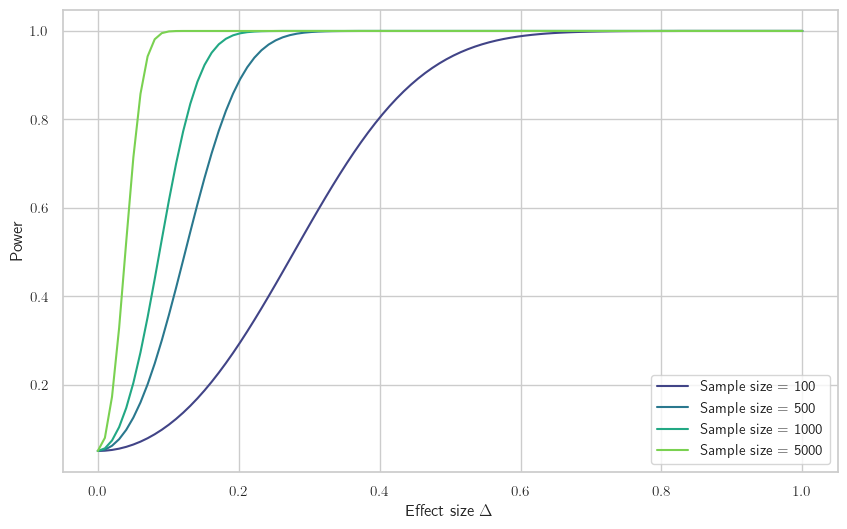

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.power import TTestIndPower
W = 6.2   # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})
plt.rcParams['savefig.dpi'] = 300


# Set a Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", 4)  # Example: using the "viridis" palette

# Parameters
alpha = 0.05
sample_sizes = [100, 500, 1000, 5000]  # Example sample sizes
effect_sizes = np.linspace(0, 1, 100)  # Range of effect sizes

# Initialize power analysis
analysis = TTestIndPower()

# Generate the power curves
plt.figure(figsize=(10, 6))
for idx, n in enumerate(sample_sizes):
    power = analysis.power(effect_size=effect_sizes, nobs1=n, alpha=alpha)
    plt.plot(effect_sizes, power, label=f'Sample size = {n}', color=palette[idx])

# Customize the plot
plt.xlabel(r'Effect size $\Delta$')
plt.ylabel('Power')
# plt.axhline(0.8, color='gray', linestyle='--', label='Power = 0.8')
plt.legend()
plt.grid(True)
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/power_curve.png')
# Show plot
plt.show()


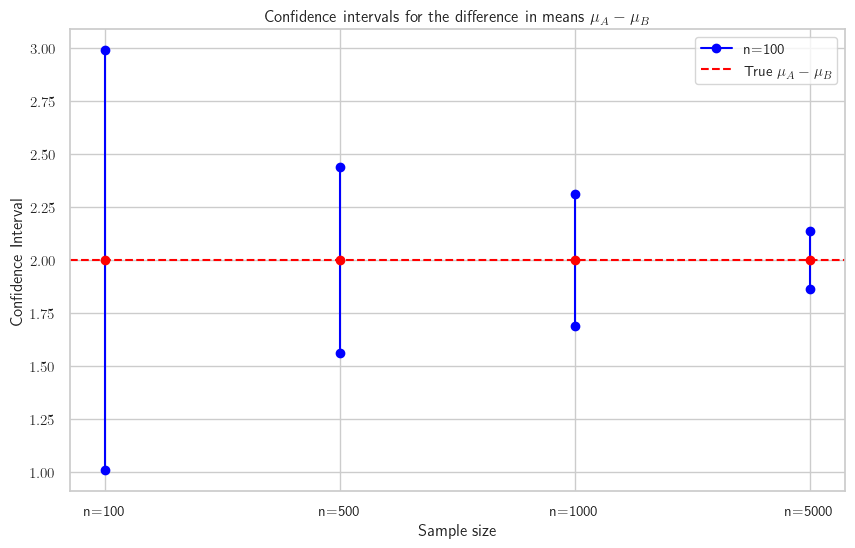

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set a Seaborn style
sns.set(style="whitegrid")

# Parameters
alpha = 0.05
confidence_level = (1 - alpha) * 100
sample_sizes = [100, 500, 1000, 5000]  # Example sample sizes
mean_diff = 2  # Hypothetical difference in means
std_diff = 5  # Hypothetical standard deviation of the difference

# Calculate the confidence intervals
conf_intervals = []
for n in sample_sizes:
    se_diff = std_diff / np.sqrt(n)
    margin_of_error = stats.t.ppf(1 - alpha/2, df=n-1) * se_diff
    conf_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)
    conf_intervals.append(conf_interval)

# Plot the confidence intervals
plt.figure(figsize=(10, 6))
for i, (n, ci) in enumerate(zip(sample_sizes, conf_intervals)):
    plt.plot([i, i], ci, color='blue', marker='o', label=f'n={n}' if i == 0 else "")
    plt.scatter([i], [mean_diff], color='red', zorder=5)  # Plot the mean difference as a red dot

# Customize the plot
plt.xticks(range(len(sample_sizes)), labels=[f'n={n}' for n in sample_sizes])
plt.axhline(mean_diff, color='red', linestyle='--', label=r'True $\mu_A - \mu_B$')
plt.title(r'Confidence intervals for the difference in means $\mu_A - \mu_B$')
plt.xlabel('Sample size')
plt.ylabel(r'Confidence Interval')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# Practical Considerations

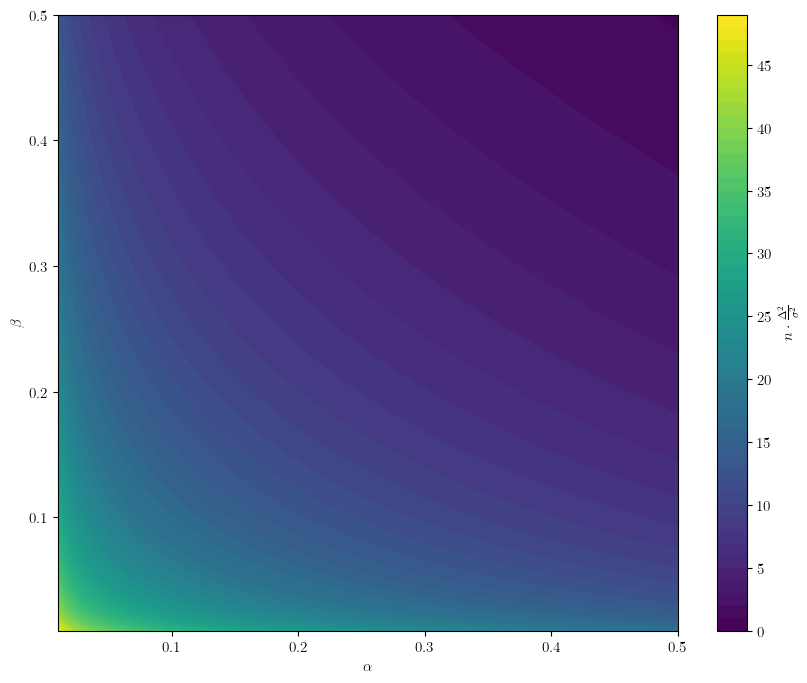

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

W = 4   # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})
plt.rcParams['savefig.dpi'] = 300

# Stałe
sigma = 1
delta = 1
# Przedziały dla alfa i beta
alpha_values = np.linspace(0.01, 0.5, 100)  # Zakres wartości alpha od 0.01 do 0.1
beta_values = np.linspace(0.01, 0.5, 100)  # Zakres wartości beta od 0.1 do 0.5

# Siatka wartości alfa i beta
alpha_grid, beta_grid = np.meshgrid(alpha_values, beta_values)

# Funkcja obliczająca n dla podanych alfa i beta
def calculate_n(alpha, beta, sigma, delta):
    Z_alpha = norm.ppf(1 - alpha / 2)
    Z_beta = norm.ppf(1 - beta)
    n = 2 * (Z_alpha + Z_beta)**2 * sigma**2 / delta**2
    return n

# Obliczenie n dla każdego punktu na siatce
n_grid = calculate_n(alpha_grid, beta_grid, sigma, delta)

# Generowanie mapy cieplnej (heatmap)
plt.figure(figsize=(10, 8))
plt.contourf(alpha_grid, beta_grid, n_grid, levels=50, cmap='viridis')
plt.colorbar(label=r'$n \cdot \frac{\Delta^2}{\sigma^2}$  ')
# plt.title('Heatmap of Sample Size (n) for Various Alpha and Beta Values')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.gca().invert_yaxis()  # Odwrócenie osi Y dla lepszej czytelności

# Zapisanie wykresu do pliku PDF
# plt.savefig('sample_size_heatmap.png')
plt.gca().invert_yaxis()
plt.show()


# Deviance Measure

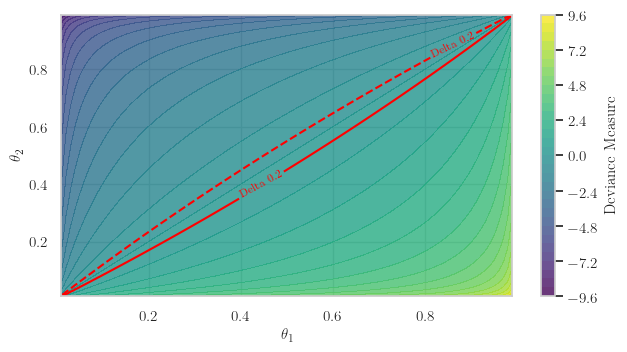

In [121]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

W = 6.5  # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})
plt.rcParams['savefig.dpi'] = 300

# Definicja funkcji deviance dla rozkładu Bernoulliego
def deviance_bernoulli(theta_1, theta_2):
    return np.log((1 - theta_2) / (1 - theta_1)) + np.log(theta_1 / theta_2)

# Parametry do wykresu
theta_1_values = np.linspace(0.01, 0.99, 100)  # Pomijamy 0 i 1, bo logarytm nie jest tam zdefiniowany
theta_2_values = np.linspace(0.01, 0.99, 100)
theta_1, theta_2 = np.meshgrid(theta_1_values, theta_2_values)

# Obliczanie deviance
deviance_values = deviance_bernoulli(theta_1, theta_2)

# Wartości delta
delta_values = [0.2]  # Różne wartości delta

# Wykres konturowy i gridplot

# Wypełniony wykres konturowy (heatmapa)
contourf = plt.contourf(theta_1, theta_2, deviance_values, cmap='viridis', alpha=0.8, levels=30)

# Dodanie linii konturowych dla różnych wartości delta
contour_colors = ['red', 'green', 'red', 'purple', 'orange']
for i, delta in enumerate(delta_values):
    contour = plt.contour(theta_1, theta_2, deviance_values, levels=[-delta, delta], colors=[contour_colors[i]], linestyles=['--', '-'])
    plt.clabel(contour, inline=True, fontsize=8, fmt=f'Delta {delta}')

# Dodanie paska kolorów
cbar = plt.colorbar(contourf)
cbar.set_label('Deviance Measure')

# plt.title('Contour Plot and Gridplot of Deviance Measure for Bernoulli Distribution with Multiple Delta Values')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.grid(True)
plt.tight_layout()
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/bernoulli_deviance.png')
plt.show()

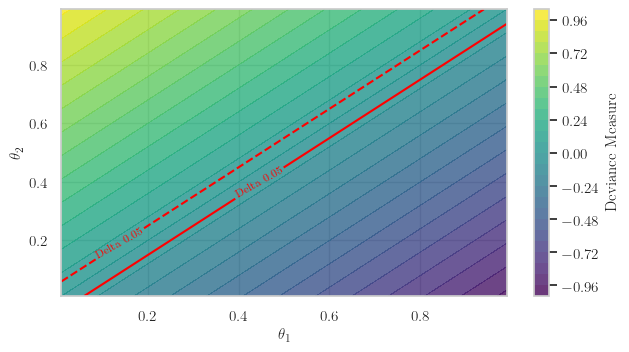

In [120]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

W = 6.5  # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})
plt.rcParams['savefig.dpi'] = 300

# Definicja funkcji deviance dla rozkładu Bernoulliego
def deviance_bernoulli(theta_1, theta_2):
    return theta_2 - theta_1
# Parametry do wykresu
theta_1_values = np.linspace(0.01, 0.99, 100)  # Pomijamy 0 i 1, bo logarytm nie jest tam zdefiniowany
theta_2_values = np.linspace(0.01, 0.99, 100)
theta_1, theta_2 = np.meshgrid(theta_1_values, theta_2_values)

# Obliczanie deviance
deviance_values = deviance_bernoulli(theta_1, theta_2)

# Wartości delta
delta_values = [0.05]  # Różne wartości delta


# Wypełniony wykres konturowy (heatmapa)
contourf = plt.contourf(theta_1, theta_2, deviance_values, cmap='viridis', alpha=0.8, levels=30)

# Dodanie linii konturowych dla różnych wartości delta
contour_colors = ['red', 'green', 'red', 'purple', 'orange']
for i, delta in enumerate(delta_values):
    contour = plt.contour(theta_1, theta_2, deviance_values, levels=[-delta, delta], colors=[contour_colors[i]], linestyles=['-', "--"])
    plt.clabel(contour, inline=True, fontsize=8, fmt=f'Delta {delta}')

# Dodanie paska kolorów
cbar = plt.colorbar(contourf)
cbar.set_label('Deviance Measure')

# plt.title('Contour Plot and Gridplot of Deviance Measure for Bernoulli Distribution with Multiple Delta Values')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.grid(True)
plt.tight_layout()
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/normal_deviance.png')
plt.show()

# AVR stop time

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpire import WorkerPool    

sns.set_style("darkgrid")
sns.set_palette("viridis")

def simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations):
    thresholds = {
        'upper': np.log((1 - alpha) / alpha),
        'lower': np.log(alpha / (1 - alpha))
    }
    
    stopping_times = []
    type_1_errors = 0
    type_2_errors = 0
    error = 0

    for _ in range(n_simulations):
        n_A, n_B = n_initial, n_initial
        x_A, x_B = np.random.binomial(1, p_A, n_A), np.random.binomial(1, p_B, n_B)
        log_likelihood_ratio = 0
        
        t = 1
        while True:
            p_hat_A = np.mean(x_A[:t])
            p_hat_B = np.mean(x_B[:t])

            log_likelihood_ratio = t * (p_hat_B - p_hat_A) * delta
            
            if log_likelihood_ratio > thresholds['upper']:
                stopping_times.append(t)
                if p_A >= p_B:  # When p_A equals p_B, rejecting H0 is a Type I error
                    error += 1
                break
            elif log_likelihood_ratio < thresholds['lower']:
                stopping_times.append(t)
                if p_A <= p_B:  # When p_A is not equal to p_B, accepting H0 is a Type II error
                    error += 1
                break
            elif t >= len(x_A):
                stopping_times.append(t)
                break
            
            t += 1

    avg_stopping_time = np.mean(stopping_times)
    type_1_error_rate = type_1_errors / n_simulations
    type_2_error_rate = type_2_errors / n_simulations

    return avg_stopping_time, error

# Simulation parameters
p_A_values = np.arange(0.05, 1, 0.05)  # Range of p_A values
p_B_values = np.arange(0.05, 1, 0.05)  # Range of p_B values
n_initial = 2000  # Initial sample size for both groups
delta = 0.3  # Risk tolerance
alpha = 0.05  # Significance level
n_simulations = 1000  # Number of simulations

# Initialize matrices to store results
avg_stopping_times_matrix = np.zeros((len(p_A_values), len(p_B_values)))
type_1_error_matrix = np.zeros((len(p_A_values), len(p_B_values)))
type_2_error_matrix = np.zeros((len(p_A_values), len(p_B_values)))
error_matrix = np.zeros((len(p_A_values), len(p_B_values)))
# Run simulations for all combinations of p_A and p_B



for i, p_A in enumerate(p_A_values):
    for j, p_B in enumerate(p_B_values):
        avg_stopping_time, error = simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations)
        avg_stopping_times_matrix[i, j] = avg_stopping_time
        error_matrix[i, j] = error/n_simulations

# Plotting the heatmaps



In [ ]:
import pickle
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/avg_stopping_times_matrix.pkl", "wb") as f:
    pickle.dump(avg_stopping_times_matrix, f)
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/error_matrix.pkl", "wb") as f:
    pickle.dump(error_matrix, f)

In [84]:
import pickle
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/avg_stopping_times_matrix.pkl", "rb") as f:
    avg_stopping_times_matrix = pickle.load(f)
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/error_matrix.pkl", "rb") as f:
    error_matrix = pickle.load(f)

/tmp/ipykernel_152599/3024635277.py:31: RuntimeWarning: divide by zero encountered in divide
  ys =  1 - 1/(1+xs*np.exp(-delta)/(1-xs))


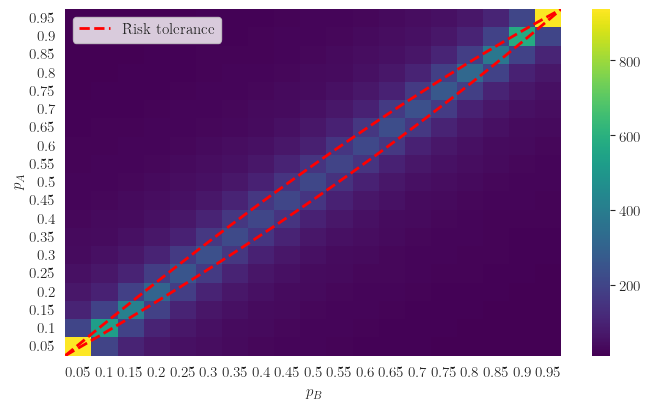

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

W = 8  # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})
plt.rcParams['savefig.dpi'] = 300
p_A_values = np.arange(0.05, 1, 0.05)  # Range of p_A values
p_B_values = np.arange(0.05, 1, 0.05)  # Range of p_B values
delta = 0.2

sns.heatmap(avg_stopping_times_matrix, xticklabels=np.round(p_B_values, 2), yticklabels=np.round(p_A_values, 2), cmap='viridis', annot=False)
plt.xlabel(r'$p_B$')
plt.ylabel(r'$p_A$')
# plt.title('Average Stopping Time')
plt.gca().invert_yaxis()
xs = np.linspace(0, 1, 101)

ys =  1 - 1/(1+xs*np.exp(-delta)/(1-xs))
plt.plot(xs*19, ys*19, color='red', linestyle='dashed', linewidth=2, label='Risk tolerance')
plt.plot(xs*19, (2*xs-ys)*19, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/average_stopping_time_matrix.png')
plt.show()

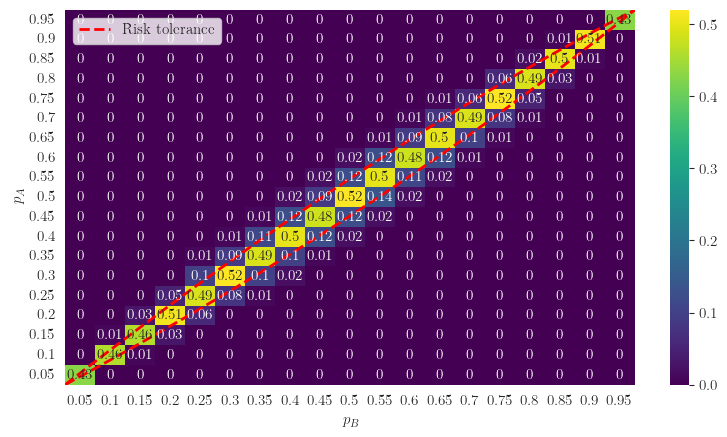

In [109]:
W = 8  # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})
plt.rcParams['savefig.dpi'] = 300

sns.heatmap(np.round(error_matrix, 2), xticklabels=np.round(p_B_values, 2), yticklabels=np.round(p_A_values, 2), cmap='viridis', annot=True)
plt.xlabel(r'$p_B$')
plt.ylabel(r'$p_A$')
# plt.title('Error Rate')
plt.gca().invert_yaxis()

plt.plot(xs*19, ys*19, color='red', linestyle='dashed', linewidth=2, label='Risk tolerance')
plt.plot(xs*19, (2*xs-ys)*19, color='red', linestyle='dashed', linewidth=2)
plt.tight_layout()
plt.legend()
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/error_rate_matrix.png')
plt.show()

/tmp/ipykernel_528256/390064708.py:34: RuntimeWarning: divide by zero encountered in divide
  ys =  1 - 1/(1+xs*np.exp(-0.20)/(1-xs))
/tmp/ipykernel_528256/390064708.py:47: RuntimeWarning: divide by zero encountered in divide
  ys =  1 - 1/(1+xs*np.exp(-0.20)/(1-xs))


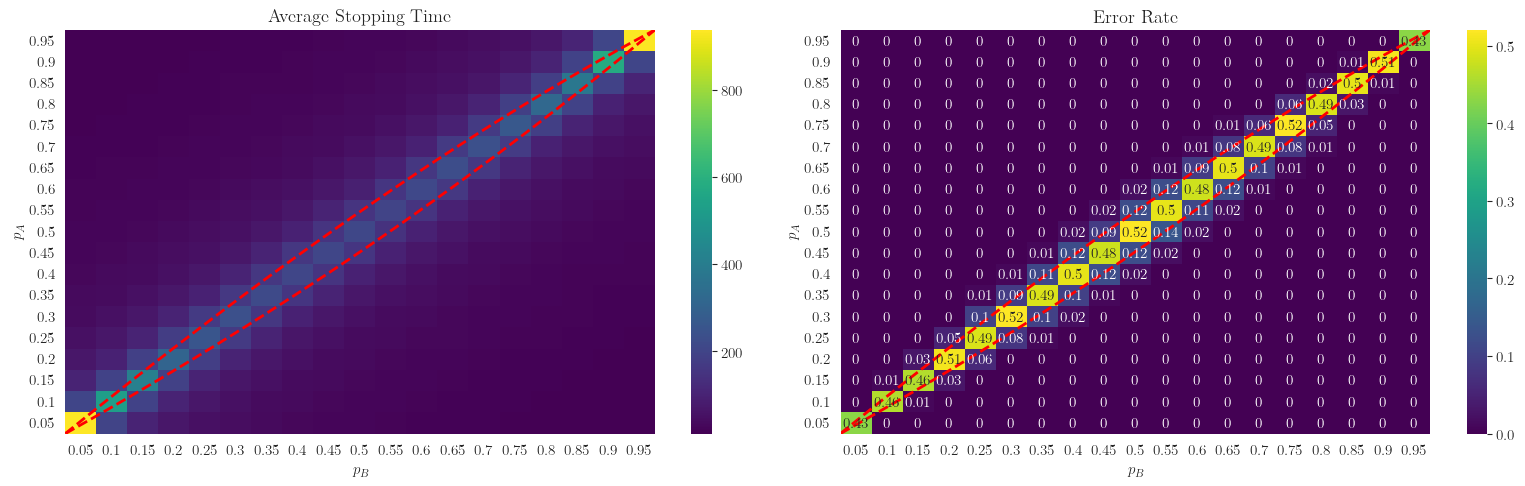

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

W = 6.2   # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

plt.rcParams['savefig.dpi'] = 300

p_A_values = np.arange(0.05, 1, 0.05)  # Range of p_A values
p_B_values = np.arange(0.05, 1, 0.05)  # Range of p_B values
delta = 0.2
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.heatmap(avg_stopping_times_matrix, xticklabels=np.round(p_B_values, 2), yticklabels=np.round(p_A_values, 2), cmap='viridis', annot=False)
plt.xlabel(r'$p_B$')
plt.ylabel(r'$p_A$')
plt.title('Average Stopping Time')
plt.gca().invert_yaxis()
xs = np.linspace(0, 1, 101)

ys =  1 - 1/(1+xs*np.exp(-delta)/(1-xs))
plt.plot(xs*19, ys*19, color='red', linestyle='dashed', linewidth=2)
plt.plot(xs*19, (2*xs-ys)*19, color='red', linestyle='dashed', linewidth=2)



plt.subplot(1, 2, 2)
sns.heatmap(np.round(error_matrix, 2), xticklabels=np.round(p_B_values, 2), yticklabels=np.round(p_A_values, 2), cmap='viridis', annot=True)
plt.xlabel(r'$p_B$')
plt.ylabel(r'$p_A$')
plt.title('Error Rate')
plt.gca().invert_yaxis()

plt.plot(xs*19, ys*19, color='red', linestyle='dashed', linewidth=2)
plt.plot(xs*19, (2*xs-ys)*19, color='red', linestyle='dashed', linewidth=2)

plt.tight_layout()
plt.show()

# p_a = 0.5

In [239]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("viridis")

def simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations):
    thresholds = {
        'upper': np.log((1 - alpha) / alpha),
        'lower': np.log(alpha / (1 - alpha))
    }
    
    stopping_times = []
    error = 0
    for _ in range(n_simulations):
        n_A, n_B = n_initial, n_initial
        x_A, x_B = np.random.binomial(1, p_A, n_A), np.random.binomial(1, p_B, n_B)
        log_likelihood_ratio = 0
        
        t = 1
        while True:
            p_hat_A = np.mean(x_A[:t])
            p_hat_B = np.mean(x_B[:t])

            log_likelihood_ratio = t * (p_hat_B - p_hat_A) * delta
            
            if log_likelihood_ratio > thresholds['upper']:
                stopping_times.append(t)
                if p_A >= p_B:  # H0 is true, but we rejected it
                    error += 1
                break
            elif log_likelihood_ratio < thresholds['lower']:
                stopping_times.append(t)
                if p_A <= p_B:  # H1 is true, but we accepted H0
                    error += 1
                break
            elif t >= len(x_A):
                stopping_times.append(t)
                break
            
            t += 1

    error = error / n_simulations
    return stopping_times, error

# Simulation parameters
p_A = 0.5  # Fixed p_A value
p_B_values_pa05 = np.concatenate((np.arange(0.05, 0.5, 0.05), np.arange(0.46, 0.5, 0.01),  np.array([0.495,  0.505]), np.arange(0.51, 0.54, 0.01), np.arange(0.55, 1, 0.05)))
n_initial = 5000  # Initial sample size for both groups
delta = 0.2  # Risk tolerance
alpha = 0.05  # Significance level
n_simulations = 2000  # Number of simulations

# Initialize lists to store results
stopping_times_pa05 = []
avg_stopping_times_pa05 = []
type_I_errors = []
type_II_errors = []
error_rates_pa05 = []
# Run simulations for all values of p_B
for p_B in p_B_values_pa05:
    stopping_time_pa05, error_rate = simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations)
    stopping_times_pa05.append(stopping_time_pa05)
    avg_stopping_times_pa05.append(np.mean(stopping_time_pa05))
    error_rates_pa05.append(error_rate)


In [243]:
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/stopping_times_pa05.pkl", "wb") as f:
    pickle.dump(stopping_times_pa05, f)
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/avg_stopping_times_pa05.pkl", "wb") as f:
    pickle.dump(avg_stopping_times_pa05, f)
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/error_rates_pa05.pkl", "wb") as f:
    pickle.dump(error_rates_pa05, f)

In [2]:
import pickle
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/stopping_times_pa05.pkl", "rb") as f:
    stopping_times_pa05 = pickle.load(f)
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/avg_stopping_times_pa05.pkl", "rb") as f:
    avg_stopping_times_pa05 = pickle.load(f)
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/error_rates_pa05.pkl", "rb") as f:
    error_rates_pa05 = pickle.load(f)

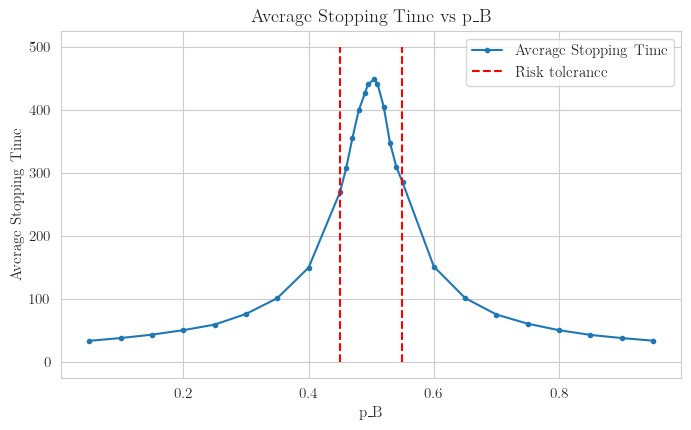

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

W = 8   # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})
plt.rcParams['savefig.dpi'] = 300
p_B_values_pa05 = np.concatenate((np.arange(0.05, 0.5, 0.05), np.arange(0.46, 0.5, 0.01),  np.array([0.495,  0.505]), np.arange(0.51, 0.54, 0.01), np.arange(0.55, 1, 0.05)))

plt.plot(p_B_values_pa05, avg_stopping_times_pa05, marker='.', linestyle='-', label='Average Stopping Time')
plt.title('Average Stopping Time vs p_B')
plt.xlabel('p_B')
plt.ylabel('Average Stopping Time')
plt.grid(True)
xs = 0.5
ys =  1 - 1/(1+xs*np.exp(-0.20)/(1-xs))
plt.vlines(ys, 0, 500, color='red', linestyle='dashed', linewidth=1.5, label='Risk tolerance')
plt.vlines(2*xs - ys, 0, 500, color='red', linestyle='dashed', linewidth=1.5)
plt.legend()
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/average_stopping_time_pa05.png')
plt.show()



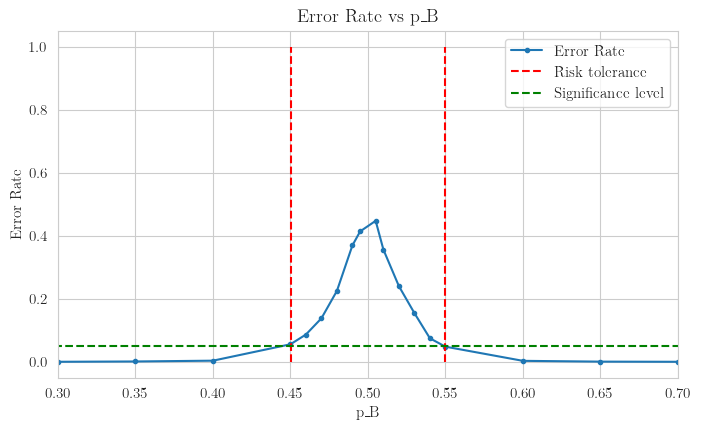

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

W = 8   # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})
plt.rcParams['savefig.dpi'] = 300

plt.plot(p_B_values_pa05, error_rates_pa05, marker='.', linestyle='-', label='Error Rate')
plt.title('Error Rate vs p_B')
plt.xlabel('p_B')
plt.ylabel('Error Rate')
plt.grid(True)

plt.vlines(ys, 0, 1, color='red', linestyle='dashed', linewidth=1.5)
plt.vlines(2*xs - ys, 0, 1, color='red', linestyle='dashed', linewidth=1.5, label='Risk tolerance')
plt.hlines(0.05, 0, 1, color='green', linestyle='dashed', linewidth=1.5, label='Significance level')
plt.legend()
plt.xlim(0.3, 0.7)
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/error_rate_pa05.png')
plt.show()

In [19]:
import pandas as pd
import numpy as np

# Tworzenie DataFrame z danych
df = pd.DataFrame(stopping_times_pa05).T

# Zdefiniowanie wartości dla p_B i zaokrąglenie do 2 miejsc po przecinku bez dodatkowych zer
p_B_values_pa05 = np.concatenate(
    (
        np.arange(0.05, 0.5, 0.05),
        np.arange(0.46, 0.5, 0.01),
        np.array([0.495, 0.505]),
        np.arange(0.51, 0.54, 0.01),
        np.arange(0.55, 1, 0.05),
    )
)
p_B_values_pa05 = [f"{x:.2f}".rstrip('0').rstrip('.') for x in p_B_values_pa05]
df.columns = p_B_values_pa05

# Obliczenie statystyk opisowych
data = df.describe()

# Dodanie wiersza "Error Rate"
data.loc["Error Rate"] = np.array(error_rates_pa05)

# Wybranie odpowiednich kolumn i zaokrąglenie wartości
selected_columns = [1, 3, 5, 7, 8, 10, 11, 12, 13]
selected_data = data.iloc[1:, selected_columns]

# Definicja funkcji formatowania
def format_number(x):
    if pd.isna(x):
        return ""
    elif x % 1 == 0:
        return f"{int(x)}"
    else:
        return f"{x:.2f}"

# Dodanie nagłówka p_B nad wartościami kolumn
latex_table = selected_data.to_latex(
    float_format=format_number,
    caption="Descriptive Statistics and Error Rate",
    label="tab:descriptive_stats",
    column_format="l" + "c" * len(selected_data.columns),
    header=True,
    index=True,
    multicolumn=True,
    multicolumn_format='c',
    bold_rows=True
)

# Dodanie linii z nagłówkiem "p_B"
latex_table = latex_table.replace("\\begin{tabular}{", "\\begin{tabular}{l")
latex_table = latex_table.replace("\\toprule", "\\toprule\n & \\multicolumn{" + str(len(selected_columns)) + "}{c}{$p_B$} \\\\ \\cmidrule(lr){2-" + str(len(selected_columns) + 1) + "}")

# Zamiana % na \% w wygenerowanym LaTeX
latex_table = latex_table.replace('%', r'\%')

# Wyświetlenie tabeli w formacie LaTeX
print(latex_table)


\begin{table}
\caption{Descriptive Statistics and Error Rate}
\label{tab:descriptive_stats}
\begin{tabular}{llccccccccc}
\toprule
 & \multicolumn{9}{c}{$p_B$} \\ \cmidrule(lr){2-10}
 & 0.1 & 0.2 & 0.3 & 0.4 & 0.45 & 0.47 & 0.48 & 0.49 & 0.49 \\
\midrule
\textbf{mean} & 37.69 & 50.21 & 75.92 & 149.46 & 269.08 & 355.41 & 398.96 & 426.36 & 441.07 \\
\textbf{std} & 8.92 & 15.40 & 29.84 & 81.40 & 192.76 & 266.59 & 321.06 & 336.41 & 363.75 \\
\textbf{min} & 18 & 19 & 22 & 31 & 34 & 33 & 23 & 37 & 44 \\
\textbf{25\%} & 31 & 40 & 55 & 91 & 136 & 167 & 179 & 186 & 192 \\
\textbf{50\%} & 37 & 48 & 70 & 130 & 217 & 280 & 298 & 330 & 327 \\
\textbf{75\%} & 43 & 58 & 91 & 188 & 349.25 & 459 & 529 & 567.25 & 580.25 \\
\textbf{max} & 86 & 122 & 232 & 613 & 1672 & 2143 & 2521 & 2445 & 2615 \\
\textbf{Error Rate} & 0 & 0 & 0 & 0.00 & 0.06 & 0.14 & 0.23 & 0.37 & 0.41 \\
\bottomrule
\end{tabular}
\end{table}



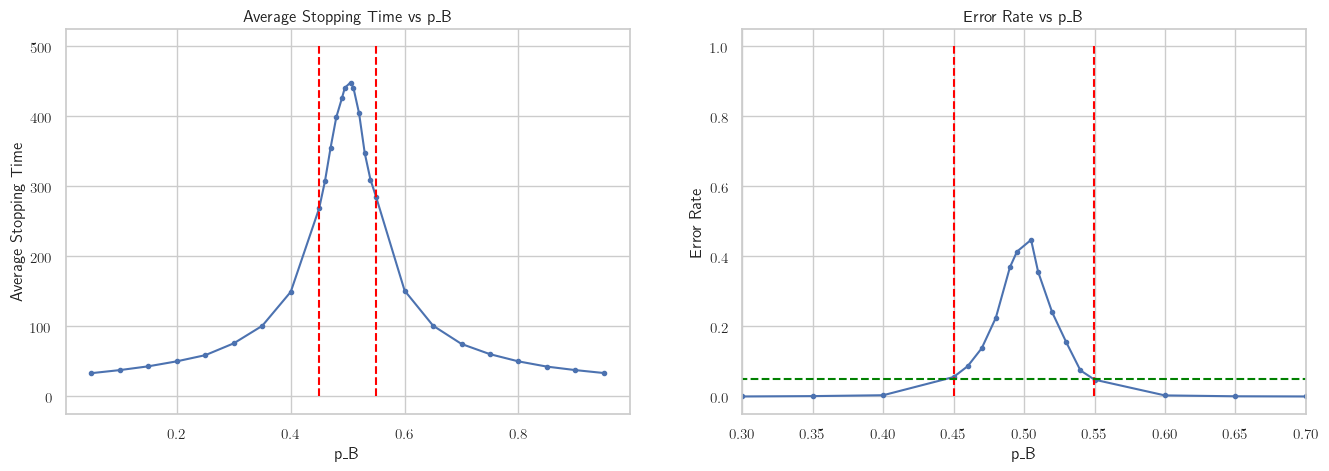

In [96]:
# Plotting the average stopping times
sns.palettes.color_palette("viridis")

plt.figure(figsize=(16, 5))
p_B_values_pa05 = np.concatenate((np.arange(0.05, 0.5, 0.05), np.arange(0.46, 0.5, 0.01),  np.array([0.495,  0.505]), np.arange(0.51, 0.54, 0.01), np.arange(0.55, 1, 0.05)))
plt.subplot(1, 2, 1)
plt.plot(p_B_values_pa05, avg_stopping_times_pa05, marker='.', linestyle='-')
plt.title('Average Stopping Time vs p_B')
plt.xlabel('p_B')
plt.ylabel('Average Stopping Time')
plt.grid(True)
xs = 0.5
ys =  1 - 1/(1+xs*np.exp(-0.20)/(1-xs))
plt.vlines(ys, 0, 500, color='red', linestyle='dashed', linewidth=1.5)
plt.vlines(2*xs - ys, 0, 500, color='red', linestyle='dashed', linewidth=1.5)

plt.subplot(1, 2, 2)
plt.plot(p_B_values_pa05, error_rates_pa05, marker='.', linestyle='-')
plt.title('Error Rate vs p_B')
plt.xlabel('p_B')
plt.ylabel('Error Rate')
plt.grid(True)
plt.vlines(ys, 0, 1, color='red', linestyle='dashed', linewidth=1.5)
plt.vlines(2*xs - ys, 0, 1, color='red', linestyle='dashed', linewidth=1.5)
plt.hlines(0.05, 0, 1, color='green', linestyle='dashed', linewidth=1.5, label='Significance level')
plt.xlim(0.3, 0.7)

plt.show()


In [101]:
np.log(1/alpha + 1/beta)/DL(0.5, 0.35)

78.2282446653098

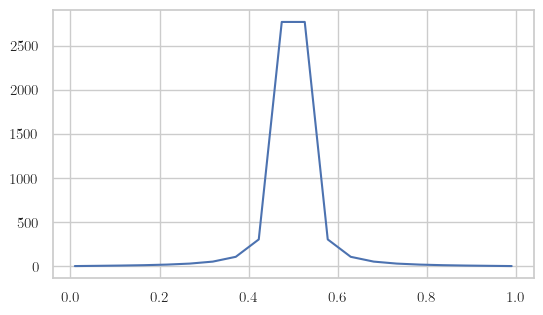

In [89]:
p1 = 0.5
p2 = 0.45
alpha = 0.05
beta = 0.05
delta = 0.05
def DL(p1, p2):
    return p1*np.log(p1/p2) + (1-p1)*np.log((1-p1)/(1-p2))
xs = np.linspace(0.01, 0.99, 20)
plt.plot(xs, np.log(1/alpha + 1/beta)/DL(p1, xs), label='D(p1||p2)')

180.7299960458119

In [254]:
import pandas as pd
import numpy as np

# Przygotowanie danych (przykładowe wartości)
p_B_values = [0.1, 0.2, 0.3, 0.4, 0.45, 0.47, 0.48, 0.49, 0.495]
index_labels = ['mean', 'std', 'min', '25\%', '50\%', '75\%', 'max', 'Error Rate']

data = np.random.rand(len(index_labels), len(p_B_values))
df = pd.DataFrame(data, index=index_labels, columns=p_B_values)

# Zaokrąglenie wartości do 2 miejsc po przecinku
df = df.round(2)

# Konwersja do LaTeX z niestandardowym nagłówkiem
latex_table = df.to_latex(
    index=True,
    header=True,
    column_format='l' + 'c' * len(p_B_values),
    float_format="%.2f",
    escape=False,
    multicolumn=True,
    multicolumn_format='c',
    caption='Tabela wyników z nagłówkiem $P_B$'
)

# Dodanie dodatkowego wiersza z nagłówkiem P_B
# lines = latex_table.splitlines()
# header_line = ' & ' + ' & '.join([f'{value:.3f}' for value in p_B_values]) + ' \\\\'
# pb_header = f'\\multirow{{2}}{{*}}{{$P_B$}}' + header_line[1:]
# lines = lines[:3] + [pb_header] + lines[4:]

# Połączenie linii w całość
# final_table = '\n'.join(lines)

print(latex_table)


\begin{table}
\caption{Tabela wyników z nagłówkiem $P_B$}
\begin{tabular}{lccccccccc}
\toprule
 & 0.100000 & 0.200000 & 0.300000 & 0.400000 & 0.450000 & 0.470000 & 0.480000 & 0.490000 & 0.495000 \\
\midrule
mean & 0.45 & 0.47 & 0.91 & 0.31 & 0.82 & 0.36 & 0.57 & 0.28 & 0.54 \\
std & 0.35 & 0.10 & 0.43 & 0.43 & 0.73 & 0.72 & 0.27 & 0.69 & 0.56 \\
min & 0.53 & 0.03 & 0.31 & 0.86 & 0.11 & 0.51 & 0.67 & 0.29 & 0.18 \\
25\% & 0.80 & 0.37 & 0.93 & 0.80 & 0.77 & 0.91 & 0.42 & 0.97 & 0.44 \\
50\% & 0.52 & 0.34 & 0.18 & 0.49 & 0.84 & 0.37 & 0.85 & 0.93 & 0.54 \\
75\% & 0.31 & 0.50 & 0.72 & 0.75 & 0.63 & 0.84 & 0.72 & 0.91 & 0.56 \\
max & 0.15 & 0.29 & 0.26 & 0.20 & 0.25 & 0.58 & 0.93 & 0.14 & 0.76 \\
Error Rate & 0.00 & 0.76 & 0.20 & 0.20 & 0.97 & 0.42 & 0.97 & 0.45 & 0.40 \\
\bottomrule
\end{tabular}
\end{table}



# Traiectory plots

## Normal

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
delta = 0.2
alpha = 0.05
beta = 0.05
n_A, n_B = 100, 100
p_X = 0.1
p_Y = -0.1
num_simulations = 1000  # Number of trajectories to simulate

upper = np.log((1 - alpha) / alpha)
lower = np.log(alpha / (1 - alpha))

# Storage for trajectories
log_A_n_all = []
cumulative_means_A = []
cumulative_means_B = []

for _ in range(num_simulations):
    X = np.random.normal(p_X, 1, n_A)
    Y = np.random.normal(p_Y, 1, n_B)
    
    log_A_n = np.cumsum(X - Y) * delta
    log_A_n_all.append(log_A_n)
    
    cumulative_means_A.append(np.cumsum(X) / np.arange(1, n_A + 1))
    cumulative_means_B.append(np.cumsum(Y) / np.arange(1, n_B + 1))

# Convert lists to numpy arrays for easier averaging
log_A_n_all = np.array(log_A_n_all)
cumulative_means_A = np.array(cumulative_means_A)
cumulative_means_B = np.array(cumulative_means_B)

mean_log_A_n = np.mean(log_A_n_all, axis=0)
mean_cumulative_means_A = np.mean(cumulative_means_A, axis=0)
mean_cumulative_means_B = np.mean(cumulative_means_B, axis=0)

# Calculate adjusted LIL boundaries
t_values = np.arange(1, n_A + 1)
lil_boundary = np.sqrt(2 * t_values * np.log(np.log(t_values + 1)))  # Add 1 to avoid log(0)

# Normalize the LLR by dividing by sqrt(t)
lil_boundary_scaled = lil_boundary * np.sqrt(p_X*(1-p_X) + p_Y*(1-p_Y))*delta
# Plot cumulative means for multiple simulation

/tmp/ipykernel_17042/3177729750.py:42: RuntimeWarning: invalid value encountered in sqrt
  lil_boundary = np.sqrt(2 * t_values * np.log(np.log(t_values + 1)))  # Add 1 to avoid log(0)
/tmp/ipykernel_17042/3177729750.py:45: RuntimeWarning: invalid value encountered in sqrt
  lil_boundary_scaled = lil_boundary * np.sqrt(p_X*(1-p_X) + p_Y*(1-p_Y))*delta


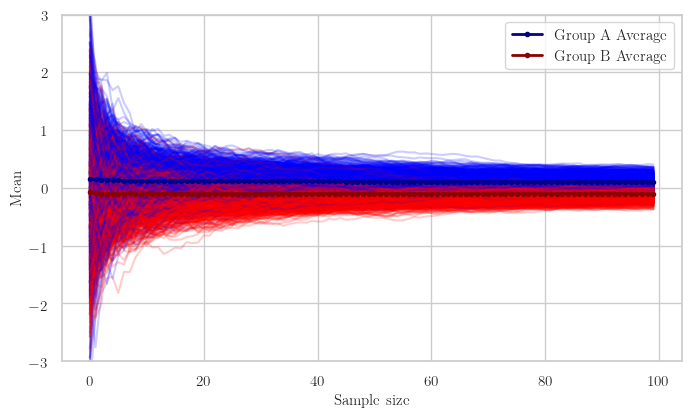

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

W = 8   # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

plt.rcParams['savefig.dpi'] = 300

# plt.figure(figsize=(14, 6))

for i in range(num_simulations):
    plt.plot(cumulative_means_A[i], color='blue', alpha=0.2)
    plt.plot(cumulative_means_B[i], color='red', alpha=0.2)
plt.plot(mean_cumulative_means_A, marker=".", color='darkblue', label='Group A Average', linewidth=2)
plt.plot(mean_cumulative_means_B, marker=".", color='darkred', label='Group B Average', linewidth=2)
# plt.title('Cumulative Means for Multiple Simulations')
plt.xlabel('Sample size')
plt.ylabel('Mean')
plt.legend()
plt.ylim(-3, 3)
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/normal_cumulative_means.png')
# Plot multiple LLR trajectories and their average

## BI

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
delta = 0.2
alpha = 0.05
beta = 0.05
n_A, n_B = 200, 200
p_X = 0.5
p_Y = 0.4
num_simulations = 1000  # Number of trajectories to simulate

upper = np.log((1 - alpha) / alpha)
lower = np.log(alpha / (1 - alpha))

# Storage for trajectories
log_A_n_all = []
cumulative_means_A = []
cumulative_means_B = []

for _ in range(num_simulations):
    X = np.random.binomial(1, p_X, n_A)
    Y = np.random.binomial(1, p_Y, n_B)
    
    log_A_n = np.cumsum(X - Y) * delta
    log_A_n_all.append(log_A_n)
    
    cumulative_means_A.append(np.cumsum(X) / np.arange(1, n_A + 1))
    cumulative_means_B.append(np.cumsum(Y) / np.arange(1, n_B + 1))

# Convert lists to numpy arrays for easier averaging
log_A_n_all = np.array(log_A_n_all)
cumulative_means_A = np.array(cumulative_means_A)
cumulative_means_B = np.array(cumulative_means_B)

mean_log_A_n = np.mean(log_A_n_all, axis=0)
mean_cumulative_means_A = np.mean(cumulative_means_A, axis=0)
mean_cumulative_means_B = np.mean(cumulative_means_B, axis=0)

# Calculate adjusted LIL boundaries
t_values = np.arange(1, n_A + 1)
lil_boundary = np.sqrt(2 * t_values * np.log(np.log(t_values + 1)))  # Add 1 to avoid log(0)

# Normalize the LLR by dividing by sqrt(t)
lil_boundary_scaled = lil_boundary * np.sqrt(p_X*(1-p_X) + p_Y*(1-p_Y))*delta
# Plot cumulative means for multiple simulation

/tmp/ipykernel_17042/2847842353.py:42: RuntimeWarning: invalid value encountered in sqrt
  lil_boundary = np.sqrt(2 * t_values * np.log(np.log(t_values + 1)))  # Add 1 to avoid log(0)


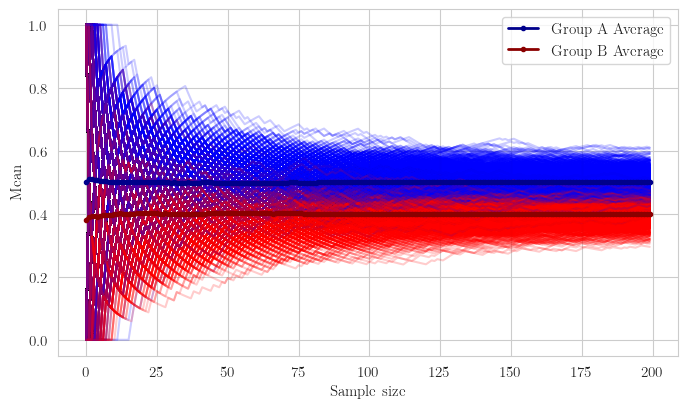

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

W = 8   # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

plt.rcParams['savefig.dpi'] = 300

# plt.figure(figsize=(14, 6))

for i in range(num_simulations):
    plt.plot(cumulative_means_A[i], color='blue', alpha=0.2)
    plt.plot(cumulative_means_B[i], color='red', alpha=0.2)
plt.plot(mean_cumulative_means_A, marker=".", color='darkblue', label='Group A Average', linewidth=2)
plt.plot(mean_cumulative_means_B, marker=".", color='darkred', label='Group B Average', linewidth=2)
# plt.title('Cumulative Means for Multiple Simulations')
plt.xlabel('Sample size')
plt.ylabel('Mean')
plt.legend()
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/cumulative_means.png')
# Plot multiple LLR trajectories and their average

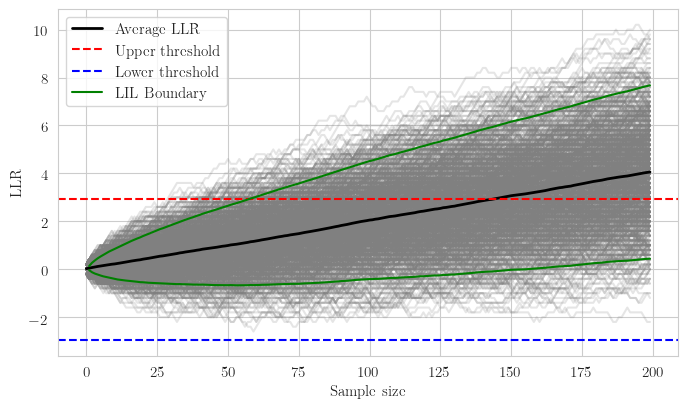

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

W = 8   # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

plt.rcParams['savefig.dpi'] = 300
# lil_boundary_scaled = lil_boundary * delta
lil_boundary_scaled = lil_boundary * np.sqrt(p_X*(1-p_X) + p_Y*(1-p_Y))*delta

for log_A_n in log_A_n_all:
    plt.plot(log_A_n, color='gray', alpha=0.2)  # Individual trajectories

plt.plot(mean_log_A_n, color='black', label='Average LLR', linewidth=2)  # Mean trajectory
plt.axhline(upper, color='red',linestyle='--',  label='Upper threshold')
plt.axhline(lower, color='blue', linestyle='--', label='Lower threshold')

# Add adjusted LIL boundaries
plt.plot(mean_log_A_n + lil_boundary_scaled, color='green', linestyle='-', label='LIL Boundary')
plt.plot(mean_log_A_n - lil_boundary_scaled, color='green', linestyle='-')

# plt.title('Log-Likelihood Ratio (LLR) Trajectories with Adjusted LIL Boundaries')
plt.xlabel('Sample size')
plt.ylabel('LLR')
plt.legend()
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/llr_trajectories.png')
plt.show()

# genmreals_plots

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("viridis")

def simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations):
    thresholds = {
        'upper': np.log((1 - alpha) / alpha),
        'lower': np.log(alpha / (1 - alpha))
    }
    
    stopping_times = []
    error = 0
    for _ in range(n_simulations):
        n_A, n_B = n_initial, n_initial
        x_A, x_B = np.random.binomial(1, p_A, n_A), np.random.binomial(1, p_B, n_B)
        log_likelihood_ratio = 0
        
        t = 1
        while True:
            p_hat_A = np.mean(x_A[:t])
            p_hat_B = np.mean(x_B[:t])

            log_likelihood_ratio = t * (p_hat_B - p_hat_A) * delta
            
            if log_likelihood_ratio > thresholds['upper']:
                stopping_times.append(t)
                if p_A >= p_B:  # H0 is true, but we rejected it
                    error += 1
                break
            elif log_likelihood_ratio < thresholds['lower']:
                stopping_times.append(t)
                if p_A <= p_B:  # H1 is true, but we accepted H0
                    error += 1
                break
            elif t >= len(x_A):
                stopping_times.append(t)
                break
            
            t += 1

    error = error / n_simulations
    return stopping_times, error

# Simulation parameters
p_A = 0.5  # Fixed p_A value
# p_B_values_pa05 = np.concatenate((np.arange(0.05, 0.5, 0.05), np.arange(0.46, 0.5, 0.01),  np.array([0.495,  0.505]), np.arange(0.51, 0.54, 0.01), np.arange(0.55, 1, 0.05)))
p_B_values_pa05 = np.array([0.2, 0.25, 0.3, 0.35, 0.4, 0.425, 0.45, 0.475, 0.48, 0.49, 0.495])
n_initial = 5000  # Initial sample size for both groups
alpha = 0.05  # Significance level
n_simulations = 10  # Number of simulations
deltas = [0.1, 0.2, 0.3]  # Different values of delta to simulate

plt.figure(figsize=(10, 6))
result_all = []
result_avg = []
result_error = []
for delta in deltas:
    all_stopping_times_pa05 = []
    avg_stopping_times_pa05 = []
    error_rates = []
    for p_B in p_B_values_pa05:
        stopping_time_pa05, error_rate = simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations)
        avg_stopping_times_pa05.append(np.mean(stopping_time_pa05))
        all_stopping_times_pa05.append(stopping_time_pa05)
        error_rates.append(error_rate)
    result_avg.append(avg_stopping_times_pa05)
    result_error.append(error_rates)
    result_all.append(all_stopping_times_pa05)

<Figure size 1000x600 with 0 Axes>

In [44]:
import pickle
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/result_avg.pkl", "wb") as f:
    pickle.dump(result_avg, f)
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/result_error.pkl", "wb") as f:
    pickle.dump(result_error, f)
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/result_all.pkl", "wb") as f:
    pickle.dump(result_all, f)

In [45]:
import pickle
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/result_avg.pkl", "rb") as f:
    result_avg = pickle.load(f)
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/result_error.pkl", "rb") as f:
    result_error = pickle.load(f)
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/result_all.pkl", "rb") as f:
    result_all = pickle.load(f)

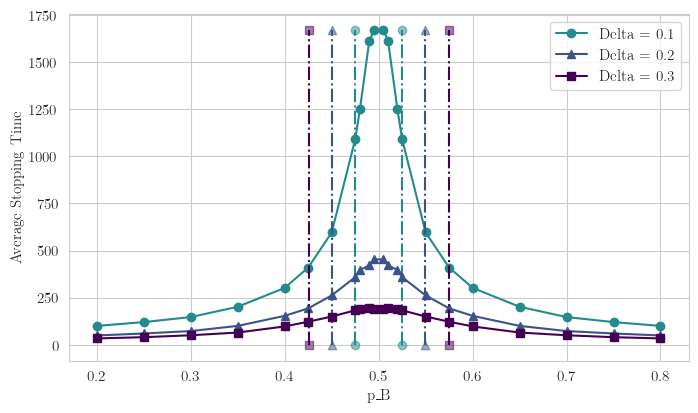

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

W = 8   # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

markrs = iter(['o', '^', 's'])
colors = iter(['blue', 'green', 'red'])
colors = iter(['#238A8D', '#3B528B', '#440154'])
xs = 0.5
deltas = [0.1, 0.2, 0.3]  # Different values of delta to simulate
p_B_values_pa05 = np.array([0.2, 0.25, 0.3, 0.35, 0.4, 0.425, 0.45, 0.475, 0.48, 0.49, 0.495])
v_max = max([max(avg_stopping_times_pa05) for avg_stopping_times_pa05 in result_avg])
for delta, avg_stopping_times_pa05 in zip(deltas, result_avg):
    c = next(colors)
    m = next(markrs)
    _p_B_values_pa05 = np.concatenate((p_B_values_pa05, 1 - p_B_values_pa05[::-1]))
    _avg_stopping_times_pa05 = avg_stopping_times_pa05 + avg_stopping_times_pa05[::-1]
    plt.plot(_p_B_values_pa05, _avg_stopping_times_pa05, label=f'Delta = {delta}', marker=m, color=c)
    ys =  1 - 1/(1+xs*np.exp(-delta)/(1-xs))
    plt.vlines(x=ys, ymin=0, ymax=v_max, color=c, linestyle='-.')
    plt.vlines(x=2*xs-ys, ymin=0, ymax=v_max, color=c, linestyle='-.')
    plt.scatter([ys, ys, 2*xs-ys, 2*xs-ys], [0,v_max, 0,v_max], color=c, marker=m, alpha=0.5)
plt.xlabel('p_B')
plt.ylabel('Average Stopping Time')
# plt.title('Average Stopping Time for Different Values of p_B and Delta')
plt.legend()
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/delta_average_stopping_time.png')
plt.show()

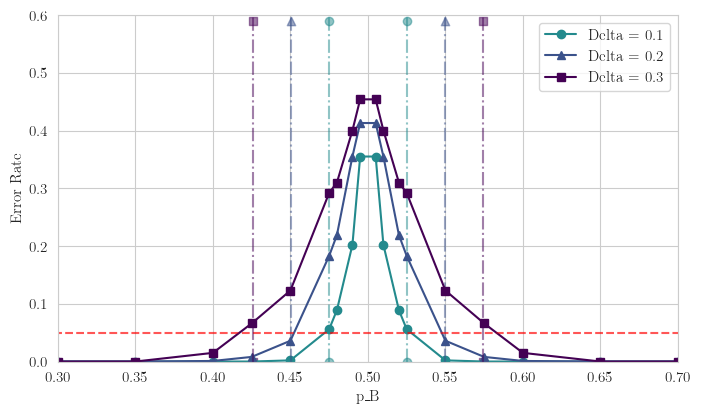

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

W = 8   # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W/(16/9)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

markrs = iter(['o', '^', 's'])
colors = iter(['blue', 'green', 'red'])
colors = iter(['#238A8D', '#3B528B', '#440154'])
xs = 0.5
deltas = [0.1, 0.2, 0.3]  # Different values of delta to simulate
p_B_values_pa05 = np.array([0.2, 0.25, 0.3, 0.35, 0.4, 0.425, 0.45, 0.475, 0.48, 0.49, 0.495])

for delta, error_rates in zip(deltas, result_error):
    c = next(colors)
    m = next(markrs)
    _p_B_values_pa05 = np.concatenate((p_B_values_pa05, 1 - p_B_values_pa05[::-1]))
    _error_rates = error_rates + error_rates[::-1]
    plt.plot(_p_B_values_pa05, _error_rates, linestyle='-', marker=m, label=f'Delta = {delta}', color=c)
    ys =  1 - 1/(1+xs*np.exp(-delta)/(1-xs))
    plt.vlines(ys, 0, 1, linestyle='-.', linewidth=1.5, colors=c, alpha=0.5)
    plt.vlines(2*xs - ys, 0, 1, linestyles="-.", linewidth=1.5, colors=c, alpha=0.5)
    plt.scatter([ys, ys, 2*xs - ys, 2*xs - ys], [0, 0.59, 0, 0.59], color=c, marker=m, alpha=0.5)
    plt.hlines(0.05, 0, 1, linestyle='--', color='red', alpha=0.3)
plt.xlabel('p_B')
plt.ylabel('Error Rate')
plt.grid(True)
plt.legend()
plt.xlim(0.3, 0.7)
plt.ylim(0, 0.6)
plt.savefig('/home/olek/studia/semestr_3_AM/master/latex/images/delta_error_rate.png')
plt.show()

In [57]:
import pandas as pd
import numpy as np
selected_columns = [0, 2, 4, 5, 6, 7, 9, 10]
def format_number(x):
    if pd.isna(x):
        return ""
    elif x % 1 == 0:
        return f"{int(x)}"
    else:
        return f"{x:.2f}"
for delta, stop_times, error_rates in zip(deltas, result_all, result_error):
    p_B_values_pa05 = np.array([0.2, 0.25, 0.3, 0.35, 0.4, 0.425, 0.45, 0.475, 0.48, 0.49, 0.495])
    df = pd.DataFrame(stop_times).T
    p_B_values_pa05 = [f"{x:.3f}".rstrip('0').rstrip('.') for x in p_B_values_pa05]
    df.columns = p_B_values_pa05    
    data = df.describe()
    data.loc["Error Rate"] = np.array(error_rates)
    selected_data = data.iloc[1:, selected_columns]


    latex_table = selected_data.to_latex(
        float_format=format_number,
        caption="Descriptive Statistics and Error Rate",
        label="tab:descriptive_stats",
        column_format="l" + "c" * len(selected_data.columns),
        header=True,
        index=True,
        multicolumn=True,
        multicolumn_format='c',
        bold_rows=True,
    )
    latex_table = latex_table.replace("\\begin{tabular}{", "\\begin{tabular}{l")
    latex_table = latex_table.replace("\\toprule", "\\toprule\n & \\multicolumn{" + str(len(selected_columns)) + "}{c}{$p_B$} \\\\ \\cmidrule(lr){2-" + str(len(selected_columns) + 1) + "}")
    latex_table = latex_table.replace('%', r'\%')
    print(latex_table)

\begin{table}
\caption{Descriptive Statistics and Error Rate}
\label{tab:descriptive_stats}
\begin{tabular}{llcccccccc}
\toprule
 & \multicolumn{8}{c}{$p_B$} \\ \cmidrule(lr){2-9}
 & 0.2 & 0.3 & 0.4 & 0.425 & 0.45 & 0.475 & 0.49 & 0.495 \\
\midrule
\textbf{mean} & 91.40 & 142 & 329.40 & 330.30 & 452.60 & 1225.80 & 1565 & 2056.10 \\
\textbf{std} & 14.46 & 37.82 & 116.20 & 118.38 & 131.35 & 697.21 & 1360.89 & 1194.56 \\
\textbf{min} & 69 & 95 & 132 & 191 & 312 & 400 & 256 & 724 \\
\textbf{25\%} & 86.25 & 108 & 259.75 & 277.50 & 370.25 & 867 & 925.75 & 1132.75 \\
\textbf{50\%} & 87.50 & 138 & 315.50 & 307 & 423 & 1101 & 1184 & 1558 \\
\textbf{75\%} & 97 & 172.75 & 385.25 & 369.25 & 488.50 & 1231.75 & 1811.75 & 3209.50 \\
\textbf{max} & 120 & 196 & 521 & 582 & 773 & 2489 & 5000 & 3710 \\
\textbf{Error Rate} & 0 & 0 & 0 & 0 & 0.00 & 0.06 & 0.20 & 0.35 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Descriptive Statistics and Error Rate}
\label{tab:descriptive_stats}
\begin{

In [ ]:
import pandas as pd
import numpy as np

# Tworzenie DataFrame z danych
df = pd.DataFrame(stopping_times_pa05).T

# Zdefiniowanie wartości dla p_B i zaokrąglenie do 2 miejsc po przecinku bez dodatkowych zer
p_B_values_pa05 = np.array([0.2, 0.25, 0.3, 0.35, 0.4, 0.425, 0.45, 0.475, 0.48, 0.49, 0.495])
p_B_values_pa05 = [f"{x:.2f}".rstrip('0').rstrip('.') for x in p_B_values_pa05]
df.columns = p_B_values_pa05

# Obliczenie statystyk opisowych
data = df.describe()

# Dodanie wiersza "Error Rate"
data.loc["Error Rate"] = np.array(error_rates_pa05)

# Wybranie odpowiednich kolumn i zaokrąglenie wartości
selected_columns = [1, 3, 5, 7, 8, 10, 11, 12, 13]
selected_data = data.iloc[1:, selected_columns]

# Definicja funkcji formatowania
def format_number(x):
    if pd.isna(x):
        return ""
    elif x % 1 == 0:
        return f"{int(x)}"
    else:
        return f"{x:.2f}"

# Dodanie nagłówka p_B nad wartościami kolumn
latex_table = selected_data.to_latex(
    float_format=format_number,
    caption="Descriptive Statistics and Error Rate",
    label="tab:descriptive_stats",
    column_format="l" + "c" * len(selected_data.columns),
    header=True,
    index=True,
    multicolumn=True,
    multicolumn_format='c',
    bold_rows=True
)

# Dodanie linii z nagłówkiem "p_B"
latex_table = latex_table.replace("\\begin{tabular}{", "\\begin{tabular}{l")
latex_table = latex_table.replace("\\toprule", "\\toprule\n & \\multicolumn{" + str(len(selected_columns)) + "}{c}{$p_B$} \\\\ \\cmidrule(lr){2-" + str(len(selected_columns) + 1) + "}")
latex_table = latex_table.replace('%', r'\%')

# Wyświetlenie tabeli w formacie LaTeX
print(latex_table)